**Problem 1**

**(1a) Load the SpotifyFeatures.csv file and report the number of samples (songs) as well as the number of features (song properties) in the dataset. Hint: you may use the Python module Pandas and its function read_csv.**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [4]:
# Load the dataset
data = pd.read_csv('SpotifyFeatures.csv')
print(data.head())

   genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#

In [5]:
# Get the number of samples (rows) and features (columns)
num_samples = data.shape[0]
num_features = data.shape[1]
print(f"Number of samples (songs): {num_samples}")
print(f"Number of features (song properties): {num_features}")

Number of samples (songs): 232725
Number of features (song properties): 18


**(1b) You will be working with samples from two genres namely ’Pop’ and ’Classical’. Retrieve all samples
belonging to the two genres and create labels for the samples i.e: ’Pop’ = 1, ’Classical’ = 0. Report how
many samples belongs to the two classes. Working with all features is not always the best solution since
it increases the computational cost and some of them may be useless for the task. For this dataset you
should be able to separate the two classes by using two features, namely ’liveness’ and ’loudness’.**

In [7]:
# Filter data for the genres 'Pop' and 'Classical'
reduced_dataset = data[data['genre'].isin(['Pop', 'Classical'])].copy()

In [8]:
# Report the number of samples in each class
print(f"Number of Pop samples: {reduced_dataset[reduced_dataset['genre'] == 'Classical'].shape[0]}")
print(f"Number of Classical samples: {reduced_dataset[reduced_dataset['genre'] == 'Pop'].shape[0]}")
print(f"Number of samples: {reduced_dataset.shape[0]}")

Number of Pop samples: 9256
Number of Classical samples: 9386
Number of samples: 18642


In [9]:
# Create labels: 'Pop' = 1, 'Classical' = 0
reduced_dataset['label'] = reduced_dataset['genre'].apply(lambda x: 1 if x == 'Pop' else 0)

In [10]:
print(reduced_dataset)

            genre              artist_name  \
104022  Classical    Johann Sebastian Bach   
104023  Classical              Harold Budd   
104024  Classical  Wolfgang Amadeus Mozart   
104025  Classical     Ludwig van Beethoven   
104026  Classical              Harold Budd   
...           ...                      ...   
167297  Classical     Ludwig van Beethoven   
167298  Classical          Frédéric Chopin   
167299  Classical     Ludwig van Beethoven   
167300  Classical     Ludwig van Beethoven   
167301  Classical          Frédéric Chopin   

                                               track_name  \
104022  Cello Suite No. 1 in G Major, BWV 1007: I. Pré...   
104023                                   Olancha Farewell   
104024  Piano Concerto No. 21 in C Major, K. 467 "Elvi...   
104025  Sonata No. 14 "Moonlight" in C-Sharp Minor", O...   
104026                                       The Whispers   
...                                                   ...   
167297  Violin Conce

**(1c) From the reduced dataset, make 2 numpy arrays. The first array will be the matrix with songs along the
rows and songs’ features ("liveness" and "loudness") as columns. This will be the input of our machine
learning method. The second array will the vector with the songs’ genre (labels or target we want to
learn). Create a training and test set by splitting the dataset. Use an 80% 20% split between the training
and test set. Split the data per class so that you keep the same class distribution in the training and test
set.**

In [12]:
X = reduced_dataset[['liveness', 'loudness']].values  # Feature matrix 
y = reduced_dataset['label'].values  # Label vector 

In [13]:
# the proportion for the training set
train_size = 0.8

In [14]:
# Get the indices of each class
pop_indices = np.where(y == 1)[0]
classical_indices = np.where(y == 0)[0]
pop_indices

array([ 1305,  1306,  1307, ..., 18435, 18436, 18437], dtype=int64)

In [15]:
np.random.seed(42)  # Set seed for reproducibility
np.random.shuffle(pop_indices)
np.random.shuffle(classical_indices)

In [16]:
# Split the indices into training and test sets
pop_train_size = int(len(pop_indices) * train_size)
classical_train_size = int(len(classical_indices) * train_size)

pop_train_indices = pop_indices[:pop_train_size]
pop_test_indices = pop_indices[pop_train_size:]

classical_train_indices = classical_indices[:classical_train_size]
classical_test_indices = classical_indices[classical_train_size:]

In [17]:
# Combine the training and test indices
train_indices = np.concatenate([pop_train_indices, classical_train_indices])
test_indices = np.concatenate([pop_test_indices, classical_test_indices])

In [18]:
# Create the training and test sets
X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]
random_index = np.random.randint(0, len(X_train))
random_index

9230

**(1d) [Bonus.] Plot the samples on the liveness vs loudness plane, with a different color for each class. From the
plot, will the classification be an easy task? why?
FYS-2021 - Weekly exercises Page 3 of 4**

In [20]:
import matplotlib.pyplot as plt

In [21]:
# Separate the data points based on their class labels
pop_data = reduced_dataset[reduced_dataset['label'] == 1]
classical_data = reduced_dataset[reduced_dataset['label'] == 0]

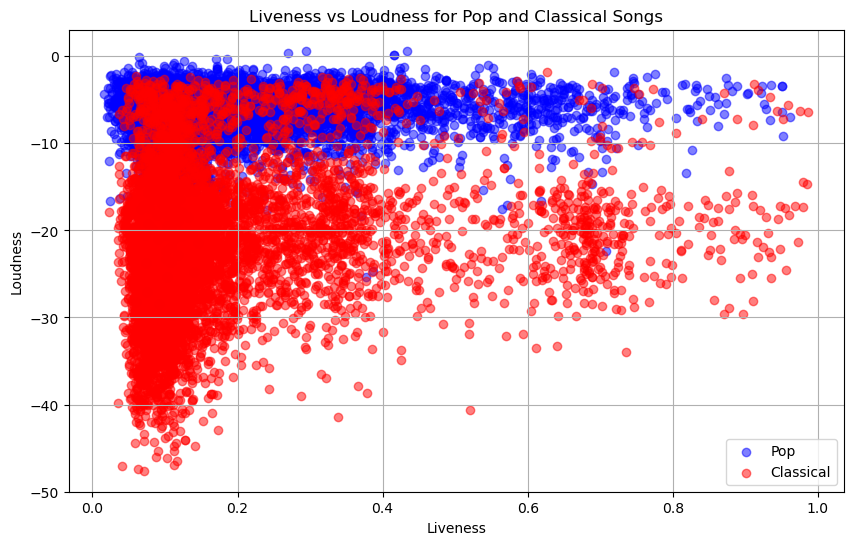

In [22]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(pop_data['liveness'], pop_data['loudness'], color='blue', label='Pop', alpha=0.5)
plt.scatter(classical_data['liveness'], classical_data['loudness'], color='red', label='Classical', alpha=0.5)

# Adding labels and title
plt.xlabel('Liveness')
plt.ylabel('Loudness')
plt.title('Liveness vs Loudness for Pop and Classical Songs')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

**Problem 2**

**(2a) Implement your own logistic discrimination classifier and use the training data to train the classifier. You
should use stochastic gradient descent and implement it in Python. Plot the training error as a function of
epochs, and report the accuracy on the training set. Try different learning rates for the gradient descent
and explain what you observe for these different values. Optional, it may help the learning process if the
data is shuffled (songs are fed to the classifier in random order).**

The sigmoid function is given by:
$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

The logistic regression hypothesis function is given by:
$$h_{\theta}(x) = \frac{1}{1 + e^{-\theta^T x}}$$

In [26]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

The cost function for logistic regression is given by:
$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log \left( h_{\theta}(x^{(i)}) \right) + (1 - y^{(i)}) \log \left( 1 - h_{\theta}(x^{(i)}) \right) \right]
$$


In [28]:
# Logistic Regression cost function
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (-1/m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
    return cost

In [29]:
# Logistic Regression Class with Cost History
class LogisticRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.cost_history = []  # List to store the cost at each iteration
        

    def fitBatchGD(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Combine weights and bias into a single theta vector
        theta = np.zeros(n_features + 1)
        X = np.c_[np.ones((n_samples, 1)), X]  # Add intercept term to X

        for _ in range(self.n_iters):
            # Linear prediction
            linear_pred = X @ theta
            # Apply sigmoid function
            predictions = sigmoid(linear_pred)

            # Calculate gradients
            dw = (1/n_samples) * np.dot(X.T, (predictions - y))

            # Update theta (including both weights and bias)
            theta -= self.lr * dw

            # Compute and store the cost for the current iteration
            cost = compute_cost(X, y, theta)
            self.cost_history.append(cost)

        # After training, separate weights and bias from theta
        self.bias = theta[0]
        self.weights = theta[1:]

    def fitStochasticGD(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
    
        # Combine weights and bias into a single theta vector
        theta = np.zeros(n_features + 1)
        X = np.c_[np.ones((n_samples, 1)), X]  # Add intercept term to X

        for _ in range(self.n_iters):
            # Randomly pick one sample
            random_index = np.random.randint(0, len(X_train))
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]

            # Linear prediction
            linear_pred = xi @ theta
            # Apply sigmoid function
            predictions = sigmoid(linear_pred)

            # Calculate gradients for this sample
            dw = xi.T @ (predictions - yi)

            # Update theta (including both weights and bias) using this single example
            theta -= self.lr * dw

            # Optional: Store the cost for this iteration (although less common in SGD)
            cost = compute_cost(X, y, theta)
            self.cost_history.append(cost)
    
        # After training, separate weights and bias from theta
        self.bias = theta[0]
        self.weights = theta[1:]
        
    def fitMinibatch(self, X, y, batch_size=10):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
    
        # Combine weights and bias into a single theta vector
        theta = np.zeros(n_features + 1)
        X = np.c_[np.ones((n_samples, 1)), X]  # Add intercept term to X
    
        for _ in range(self.n_iters):
            # Randomly select a mini-batch of 10 samples
            random_indices = np.random.randint(0, len(X), size=batch_size)
            Xi = X[random_indices]
            yi = y[random_indices]
    
            # Linear prediction for the mini-batch
            linear_pred = Xi @ theta
            # Apply sigmoid function
            predictions = sigmoid(linear_pred)
    
            # Calculate gradients for the mini-batch
            dw = Xi.T @ (predictions - yi) / batch_size
    
            # Update theta (including both weights and bias) using the mini-batch
            theta -= self.lr * dw
    
            # Optional: Store the cost for this iteration (commonly used in Mini-batch Gradient Descent)
            cost = compute_cost(X, y, theta)
            self.cost_history.append(cost)
    
        # After training, separate weights and bias from theta
        self.bias = theta[0]
        self.weights = theta[1:]

    def predict(self, X):
        X = np.c_[np.ones((X.shape[0], 1)), X]  # Add intercept term to X
        linear_pred = X @ np.r_[self.bias, self.weights]
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y <= 0.5 else 1 for y in y_pred]
        return class_pred

# Example usage:
# Assume X_train and y_train are your training data and labels.

clf = LogisticRegression(lr=0.03, n_iters=10000)
clf.fitStochasticGD(X_train, y_train)

In [30]:
clf.weights

array([0.4851401 , 0.67337228])

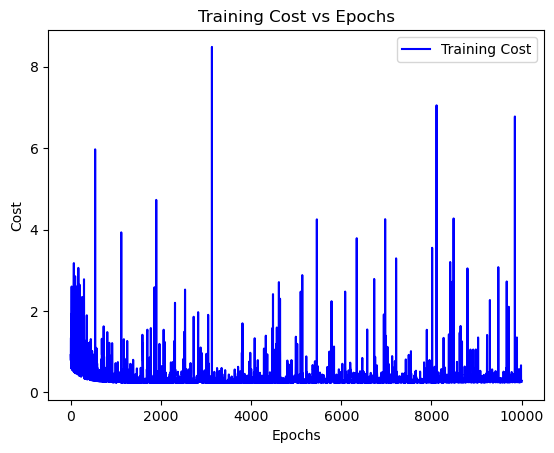

In [31]:
# Plotting the cost history to see how it decreases over time
import matplotlib.pyplot as plt

plt.plot(range(clf.n_iters), clf.cost_history, 'b-', label='Training Cost')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Training Cost vs Epochs')
plt.legend()
plt.show()

**(2b) Test your trained logistic discrimination classifier using the test set. Report the accuracy on the test set.
Is there a significant difference between the accuracy on the training and test set? If so what might that
indicate. [Optional] Inform (or brag) about your test accuracy score on Discord. It is nice to seen how
other students perform while working on the assignment.**

In [33]:
# Predict on the test data
y_pred_test = clf.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = np.mean(y_pred_test == y_test) * 100
print(f'Test Accuracy: {test_accuracy:.2f}%')

# Optional: Calculate accuracy on the training set for comparison
y_pred_train = clf.predict(X_train)
train_accuracy = np.mean(y_pred_train == y_train) * 100
print(f'Training Accuracy: {train_accuracy:.2f}%')

Test Accuracy: 90.38%
Training Accuracy: 91.72%


**(2c) [Bonus] Extract the learned parameters from your logistic regression and use them to draw the linear
line separating the data on the plot you made in question (1d). This may help you understand why your
classifier is performing well or not.**

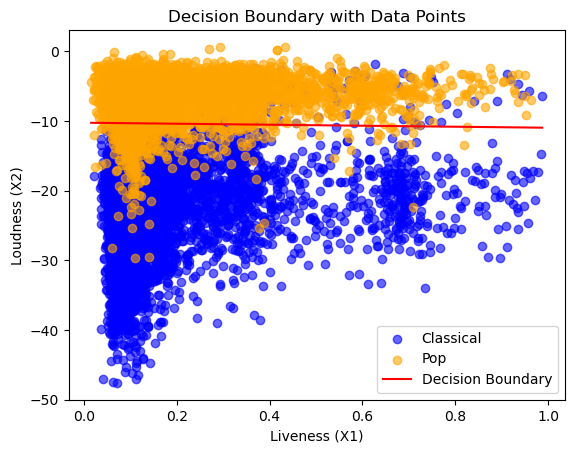

In [35]:
# Extract learned parameters
weights = clf.weights
bias = clf.bias

# Plot the data points with labels
classical = (y_train == 0)
pop = (y_train == 1)

plt.scatter(X_train[classical, 0], X_train[classical, 1], color='blue', label='Classical', alpha=0.6)
plt.scatter(X_train[pop, 0], X_train[pop, 1], color='orange', label='Pop', alpha=0.6)

# Plot the decision boundary
# Decision boundary line: weights[0] * X1 + weights[1] * X2 + bias = 0
# Rearranged to X2 = -(weights[0]/weights[1]) * X1 - bias/weights[1]

x_values = np.array([min(X_train[:, 0]), max(X_train[:, 0])])
y_values = -(weights[0] * x_values + bias) / weights[1]

plt.plot(x_values, y_values, label='Decision Boundary', color='red')

plt.xlabel('Liveness (X1)')
plt.ylabel('Loudness (X2)')
plt.title('Decision Boundary with Data Points')
plt.legend()
plt.show()


**Problem 3**

**(3a) Using the classification results from the test set in problem 2, create a confusion matrix for the classification.
Report the confusion matrix.**

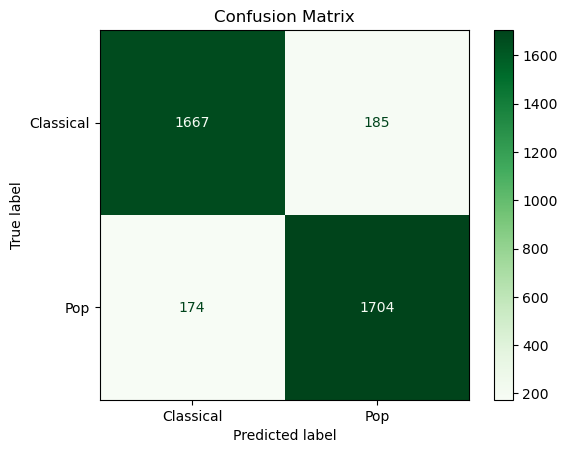

[[1667  185]
 [ 174 1704]]


In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on the test data
y_pred_test = clf.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Classical', 'Pop'])
disp.plot(cmap=plt.cm.Greens)  # You can choose a different color map if you prefer
plt.title('Confusion Matrix')
plt.show()

def create_confusion_matrix(y_true, y_pred):
    # Initialize confusion matrix
    confusion_matrix = np.zeros((2, 2), dtype=int)
    
    for true_label, pred_label in zip(y_true, y_pred):
        if true_label == 0:
            if pred_label == 0:
                confusion_matrix[0, 0] += 1  # True Negative
            else:
                confusion_matrix[0, 1] += 1  # False Positive
        elif true_label == 1:
            if pred_label == 0:
                confusion_matrix[1, 0] += 1  # False Negative
            else:
                confusion_matrix[1, 1] += 1  # True Positive
                
    return confusion_matrix

# Example usage:
# y_true = np.array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1])  # True labels
# y_pred = np.array([0, 1, 0, 0, 0, 1, 1, 0, 1, 1])  # Predicted labels

conf_matrix = create_confusion_matrix(y_test, y_pred_test)
print(conf_matrix)

**(3b) You should now have two evaluation metrics for the performance of the classifier on the test set; accuracy
and the confusion matrix. What information does the confusion matrix give you that the accuracy score
does not?**

**(3c) [Bonus.] Which songs are difficult to classify? Could you suggest some Classical songs that a Pop fan
would like? (a good song could influence positively the mood of the evaluator)**

In [41]:
# Combine true and predicted labels
combined_labels = list(zip(y_test, y_pred_test))

# Initialize lists to store misclassified indices
false_positives = []
false_negatives = []

# Iterate through combined labels and keep track of indices
for idx, (true_label, pred_label) in enumerate(combined_labels):
    if true_label == 0 and pred_label == 1:
        false_positives.append(idx)
    elif true_label == 1 and pred_label == 0:
        false_negatives.append(idx)

# Debugging: Check the number of misclassifications found
print("Number of False Positives: ", len(false_positives))
print("Number of False Negatives: ", len(false_negatives))



# Prepare HTML table for Suggested Classical Songs for a Pop Fan
html_output_pop = """
<h2>Suggested Pop Songs for a Classical Music Fan</h2>
"""

if len(false_negatives) == 0:
    html_output_pop += "<p>No suggestions, as there are no false negatives.</p>"
else:
    html_output_pop += """
    <table border="1" style="border-collapse: collapse; width: 100%;">
        <thead>
            <tr>
                <th>Song Index</th> 
                <th>Artist Name</th>
                <th>Track Name</th>
                <th>Genre</th>
                <th>Liveness</th>
                <th>Loudness</th>
            </tr>
        </thead>
        <tbody>
    """
    for idx in false_negatives[:5]:  # Only the first 5
        features = {'liveness': X_test[idx, 0], 'loudness': X_test[idx, 1]} 
        result = data[(data['liveness'] == features['liveness']) & 
                      (data['loudness'] == features['loudness']) & 
                      (data['genre'] == 'Pop')]
        if not result.empty:
            for index, row in result.iterrows():
                html_output_pop += f"""
                <tr>
                    <td>{index}</td> 
                    <td>{row['artist_name']}</td>
                    <td>{row['track_name']}</td>
                    <td>{row['genre']}</td>
                    <td>{row['liveness']}</td>
                    <td>{row['loudness']}</td>
                </tr>
                """
        else:
            html_output_pop += f"""
            <tr>
                <td colspan="5">No song found with features {features}.</td>
            </tr>
            """
    
    # Close the table
    html_output_pop += """
        </tbody>
    </table>
    """

# Display the HTML
display(HTML(html_output_pop))

# Prepare HTML table for Suggested Classical Songs for a Pop Fan
html_output = """
<h2>Suggested Classical Songs for a Pop Fan</h2>
"""

if len(false_positives) == 0:
    html_output += "<p>No suggestions, as there are no false positives.</p>"
else:
    html_output += """
    <table border="1" style="border-collapse: collapse; width: 100%;">
        <thead>
            <tr>
                <th>Song Index</th> 
                <th>Artist Name</th>
                <th>Track Name</th>
                <th>Genre</th>
                <th>Liveness</th>
                <th>Loudness</th>
            </tr>
        </thead>
        <tbody>
    """
    for idx in false_positives[:5]:  # Only the first 5
        features = {'liveness': X_test[idx, 0], 'loudness': X_test[idx, 1]} 
        result = data[(data['liveness'] == features['liveness']) & 
                      (data['loudness'] == features['loudness']) & 
                      (data['genre'] == 'Classical')]
        if not result.empty:
            for index, row in result.iterrows():
                html_output += f"""
                <tr>
                    <td>{index}</td> 
                    <td>{row['artist_name']}</td>
                    <td>{row['track_name']}</td>
                    <td>{row['genre']}</td>
                    <td>{row['liveness']}</td>
                    <td>{row['loudness']}</td>
                </tr>
                """
        else:
            html_output += f"""
            <tr>
                <td colspan="5">No song found with features {features}.</td>
            </tr>
            """
    
    # Close the table
    html_output += """
        </tbody>
    </table>
    """

# Display the HTML
display(HTML(html_output))

Number of False Positives:  185
Number of False Negatives:  174


Song Index,Artist Name,Track Name,Genre,Liveness,Loudness
112980,The Lumineers,Slow It Down,Pop,0.0859,-14.42
110334,Mac Miller,Perfecto,Pop,0.111,-11.212
150783,dvsn,Too Deep,Pop,0.264,-13.975
108770,Metro Boomin,Dreamcatcher (feat. Swae Lee & Travis Scott),Pop,0.104,-10.363
111755,Wild Child,Sinking Ship,Pop,0.11,-19.316


Song Index,Artist Name,Track Name,Genre,Liveness,Loudness
128308,Andy James,A Plan For Us,Classical,0.294,-3.781
128313,Battle Beast,Let It Roar,Classical,0.183,-3.295
128259,Blind Guardian,And Then There Was Silence - Remastered 2017,Classical,0.417,-5.956
127070,Blues Saraceno,The River (Dubstep),Classical,0.263,-8.093
127276,Andy James,Asylum,Classical,0.323,-2.926


In [42]:
data.iloc[128308]

genre                            Classical
artist_name                     Andy James
track_name                   A Plan For Us
track_id            2NtAmqihQKaipD3uMPfHmn
popularity                              33
acousticness                      0.000156
danceability                         0.374
duration_ms                         287000
energy                               0.968
instrumentalness                      0.59
key                                      A
liveness                             0.294
loudness                            -3.781
mode                                 Minor
speechiness                         0.0651
tempo                               140.05
time_signature                         4/4
valence                              0.111
Name: 128308, dtype: object